In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

## Random Walk

In [14]:
rw = pd.read_csv(".../Randwalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [15]:
rw.describe()

,rw
count,5021.000000
mean,848.636676
std,245.836278
min,272.616433
25%,678.845954
50%,818.366900
75%,1037.229739
max,1460.813210


In [16]:
rw.head()

,rw
date,
1994-01-07,500.000000
1994-01-10,488.460888
1994-01-11,493.013721
1994-01-12,508.837613
1994-01-13,486.911424


# stationary

In [17]:
from statsmodels.tsa.stattools import adfuller

result = sts.adfuller(rw)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.354659
p-value: 0.154945
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


# Create Random walk

In [18]:
from statsmodels.tsa.stattools import adfuller

rw1 = pd.Series(np.random.randn(1000).cumsum())

result1 = sts.adfuller(rw1)
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.182500
p-value: 0.681078
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


# ACF

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

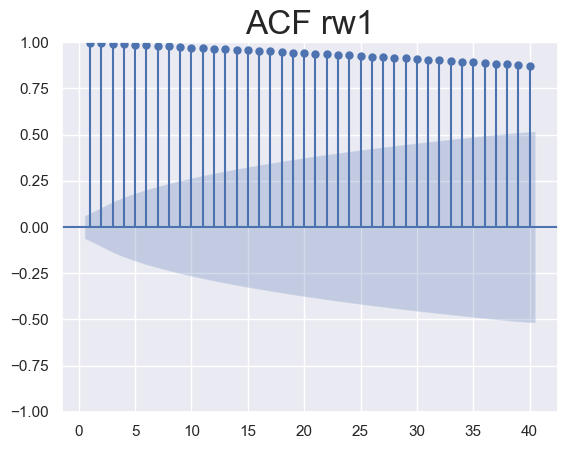

In [20]:
sgt.plot_acf(rw1, lags = 40, zero = False)
plt.title("ACF rw1", size = 24)
plt.show()

# Loading and Transforming the Data

In [21]:
raw_csv_data = pd.read_csv("D:/economy/ارشد/روش کمی مهرارا/ایلیا/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = "ffill")

In [22]:
df_comp['market_value_nikkei'] = df_comp.nikkei

In [23]:
del df_comp['spx']
del df_comp['dax']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [24]:
df_comp.isna().sum()

ftse                   0
market_value_nikkei    0
dtype: int64

In [25]:
df_comp

,ftse,market_value_nikkei
date,,
1994-01-07,3445.980000,18124.01
1994-01-10,3440.580000,18443.44
1994-01-11,3413.770000,18485.25
1994-01-12,3372.020000,18793.88
1994-01-13,3360.010000,18577.26
...,...,...
2018-01-23,7731.827774,24124.15
2018-01-24,7643.428966,23940.78
2018-01-25,7615.839954,23669.49


# The DF-Test

In [26]:
sts.adfuller(df.market_value_nikkei)

(-1.7866259053078113,
 0.3871214838898169,
 2,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 66733.61099791403)

# Return of nikkei

In [27]:
df['returns_nikkei'] = df.market_value_nikkei.pct_change(1).mul(100)
df = df.iloc[1:]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22056\4226318604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns_nikkei'] = df.market_value_nikkei.pct_change(1).mul(100)


In [28]:
sts.adfuller(df.returns_nikkei)

(-43.39242137370216,
 0.0,
 2,
 5017,
 {'1%': -3.431654095870046,
  '5%': -2.8621162697870046,
  '10%': -2.5670767490325597},
 18003.526490714186)

In [29]:
df.head()

,ftse,market_value_nikkei,returns_nikkei
date,,,
1994-01-10,3440.58,18443.44,1.762469
1994-01-11,3413.77,18485.25,0.226693
1994-01-12,3372.02,18793.88,1.669601
1994-01-13,3360.01,18577.26,-1.152609
1994-01-14,3400.56,18973.70,2.134007


# ACF and PACF for Returns of nikkei

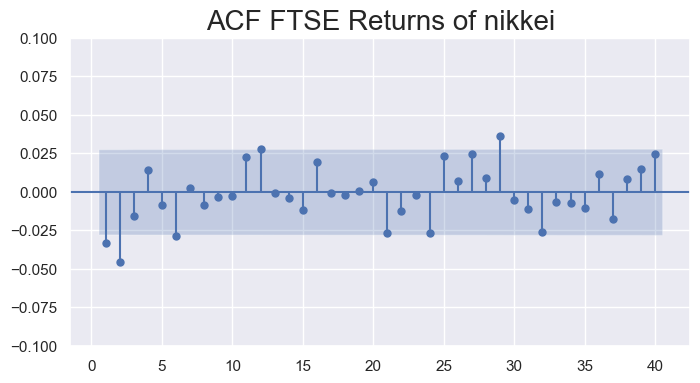

In [79]:
fig, ax = plt.subplots(figsize=(8, 4))
sgt.plot_acf(df.returns_nikkei, lags = 40, zero = False, ax = ax)
ax.set_ylim(-0.1, 0.1)
plt.title("ACF FTSE Returns of nikkei", size = 20)
plt.show()

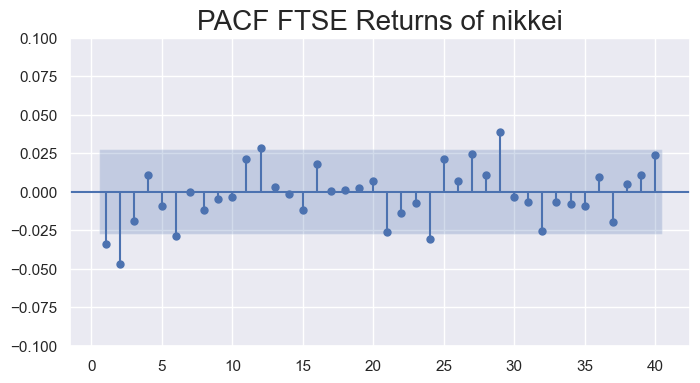

In [80]:
fig, ax = plt.subplots(figsize=(8, 4))
sgt.plot_pacf(df.returns_nikkei[1:], lags = 40, zero = False, method = ('ols') , ax = ax)
ax.set_ylim(-0.1, 0.1)
plt.title("PACF FTSE Returns of nikkei", size = 20)
plt.show()

# Higher-Lag AR Model for Returns

In [32]:
model_ar_1 = ARIMA(df.returns_nikkei, order=(1, 0, 0))

In [33]:
results_ar_1 = model_ar_1.fit()

In [34]:
print(results_ar_1.summary())

                               SARIMAX Results                                
Dep. Variable:         returns_nikkei   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9081.260
Date:                Thu, 22 Jun 2023   AIC                          18168.520
Time:                        16:53:43   BIC                          18188.083
Sample:                    01-10-1994   HQIC                         18175.375
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.020      0.200      0.842      -0.036       0.044
ar.L1         -0.0335      0.009     -3.600      0.000      -0.052      -0.015
sigma2         2.1819      0.022    100.824      0.0

In [35]:
model_ar_2 = ARIMA(df.returns_nikkei, order=(2, 0, 0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())

                               SARIMAX Results                                
Dep. Variable:         returns_nikkei   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9075.815
Date:                Thu, 22 Jun 2023   AIC                          18159.630
Time:                        16:53:44   BIC                          18185.714
Sample:                    01-10-1994   HQIC                         18168.770
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.019      0.206      0.837      -0.034       0.042
ar.L1         -0.0351      0.010     -3.624      0.000      -0.054      -0.016
ar.L2         -0.0466      0.007     -6.549      0.0

In [36]:
model_ar_3 = ARIMA(df.returns_nikkei, order=(3, 0, 0))
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary())

                               SARIMAX Results                                
Dep. Variable:         returns_nikkei   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -9074.911
Date:                Thu, 22 Jun 2023   AIC                          18159.822
Time:                        16:53:44   BIC                          18192.428
Sample:                    01-10-1994   HQIC                         18171.248
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.019      0.208      0.836      -0.034       0.041
ar.L1         -0.0360      0.010     -3.683      0.000      -0.055      -0.017
ar.L2         -0.0472      0.007     -6.645      0.0

# LLR Test

In [37]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR =(2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [38]:
LLR_test(model_ar_1 , model_ar_2)

0.001

In [39]:
LLR_test(model_ar_2 , model_ar_3)

0.179

# Return of ftse

In [40]:
df['market_value_ftse'] = df_comp.ftse

In [41]:
df.head()

,ftse,market_value_nikkei,returns_nikkei,market_value_ftse
date,,,,
1994-01-10,3440.58,18443.44,1.762469,3440.58
1994-01-11,3413.77,18485.25,0.226693,3413.77
1994-01-12,3372.02,18793.88,1.669601,3372.02
1994-01-13,3360.01,18577.26,-1.152609,3360.01
1994-01-14,3400.56,18973.70,2.134007,3400.56


In [42]:
df['returns_ftse'] = df.market_value_ftse.pct_change(1).mul(100)
df = df.iloc[1:]

In [43]:
df.head()

,ftse,market_value_nikkei,returns_nikkei,market_value_ftse,returns_ftse
date,,,,,
1994-01-11,3413.77,18485.25,0.226693,3413.77,-0.779229
1994-01-12,3372.02,18793.88,1.669601,3372.02,-1.222988
1994-01-13,3360.01,18577.26,-1.152609,3360.01,-0.356166
1994-01-14,3400.56,18973.70,2.134007,3400.56,1.206842
1994-01-17,3407.83,18725.37,-1.308812,3407.83,0.213788


In [44]:
sts.adfuller(df.returns_ftse)

(-12.790332603910052,
 7.09952358667819e-24,
 32,
 4986,
 {'1%': -3.43166220814716,
  '5%': -2.862119853748156,
  '10%': -2.567078656914853},
 15690.778602127364)

# ACF for Returns of ftse

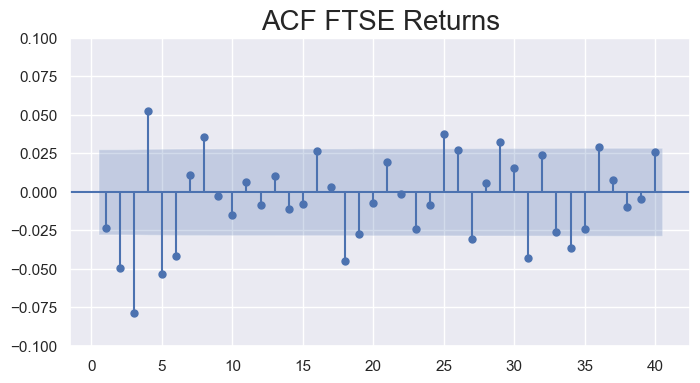

In [76]:
fig, ax = plt.subplots(figsize=(8, 4))
sgt.plot_acf(df.returns_ftse[1:], lags = 40, zero = False , ax = ax)
ax.set_ylim(-0.1, 0.1)
plt.title("ACF FTSE Returns", size = 20)
plt.show()

# Higher-Lag MA Model for Returns between MA(8) & MA(18)

In [46]:
model_ret_ma_8 = ARIMA(df.returns_ftse[1:], order=(0,0,8))  
results_ret_ma_8 = model_ret_ma_8.fit()
results_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           returns_ftse   No. Observations:                 5018
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7883.267
Date:                Thu, 22 Jun 2023   AIC                          15786.535
Time:                        16:53:57   BIC                          15851.743
Sample:                    01-12-1994   HQIC                         15809.385
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0191      0.015      1.263      0.207      -0.011       0.049
ma.L1         -0.0240      0.009     -2.542      0.011      -0.042      -0.005
ma.L2         -0.0496      0.008     -6.059      0.000      -0.066      -0.034
ma.L3         -0.0846      0.008    -10.290      0.000      -0.101      -0.068
ma.L4          0.0489      0.009      5.623      0.000       0.032       0.066
ma.L5         -0.0518      0.008     -6.293      0.000      -0.068      -0.036
ma.L6         -0.0401      0.009     -4.394      0.000      -0.058      -0.022
ma.L7          0.0084      0.009      0.940      0.347      -0.009       0.026
ma.L8          0.0366      0.009      3.881      0.000       0.018       0.055
sigma2         1.3554      0.015     91.273      0.000       1.326       1.385
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6432.68
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model_ret_ma_18 = ARIMA(df.returns_ftse[1:], order=(0,0,18))  
results_ret_ma_18 = model_ret_ma_18.fit()
print(results_ret_ma_18.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_8, model_ret_ma_18 , DF = 10)))

                               SARIMAX Results                                
Dep. Variable:           returns_ftse   No. Observations:                 5018
Model:                ARIMA(0, 0, 18)   Log Likelihood               -7874.279
Date:                Thu, 22 Jun 2023   AIC                          15788.558
Time:                        16:54:03   BIC                          15918.973
Sample:                    01-12-1994   HQIC                         15834.258
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0191      0.014      1.321      0.186      -0.009       0.047
ma.L1         -0.0262      0.010     -2.668      0.008      -0.046      -0.007
ma.L2         -0.0497      0.009     -5.844      0.0

In [48]:
model_ret_ma_6 = ARIMA(df.returns_ftse[1:], order=(0,0,6))  
results_ret_ma_6 = model_ret_ma_6.fit()
results_ret_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           returns_ftse   No. Observations:                 5018
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7886.888
Date:                Thu, 22 Jun 2023   AIC                          15789.776
Time:                        16:54:12   BIC                          15841.942
Sample:                    01-12-1994   HQIC                         15808.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0191      0.014      1.328      0.184      -0.009       0.047
ma.L1         -0.0239      0.009     -2.576      0.010      -0.042      -0.006
ma.L2         -0.0487      0.008     -5.990      0.000      -0.065      -0.033
ma.L3         -0.0826      0.008    -10.160      0.000      -0.099      -0.067
ma.L4          0.0467      0.009      5.394      0.000       0.030       0.064
ma.L5         -0.0484      0.008     -5.980      0.000      -0.064      -0.033
ma.L6         -0.0386      0.009     -4.301      0.000      -0.056      -0.021
sigma2         1.3574      0.015     92.147      0.000       1.328       1.386
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6526.02
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Residuals for Returns

In [49]:
df['res_ret_ma_6'] = results_ret_ma_6.resid[1:]

In [50]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_6.mean(),3)) + 
      "\nThe variance of the residuals is " + str(round(df.res_ret_ma_6.var(),3)))

The mean of the residuals is 0.0
The variance of the residuals is 1.358


In [54]:
round(sqrt(df.res_ret_ma_6.var()),3)
# in the worst case scenario we could be 1.164*3 = 3.5% up or down of the mean of Returns 

1.165

In [55]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]
print("The mean of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + 
      "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))

The mean of the residuals is 0.0
The variance of the residuals is 1.356


In [56]:
round(sqrt(df.res_ret_ma_8.var()),3)
# in the worst case scenario we could be 1.164*3 = 3.5% up or down of the mean of Returns 

1.164

In [57]:
LLR_test(model_ret_ma_6, model_ret_ma_8 , DF = 2)

0.027

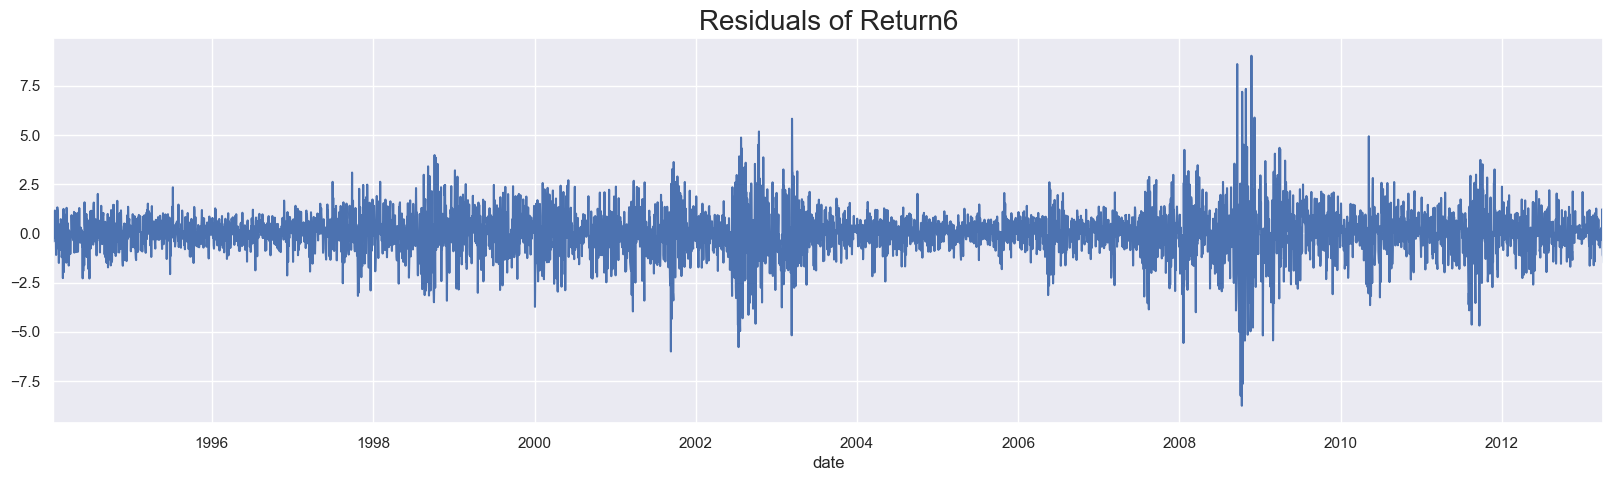

In [61]:
df.res_ret_ma_6[1:].plot(figsize = (20, 5))
plt.title('Residuals of Return6', size = 20)
plt.show()

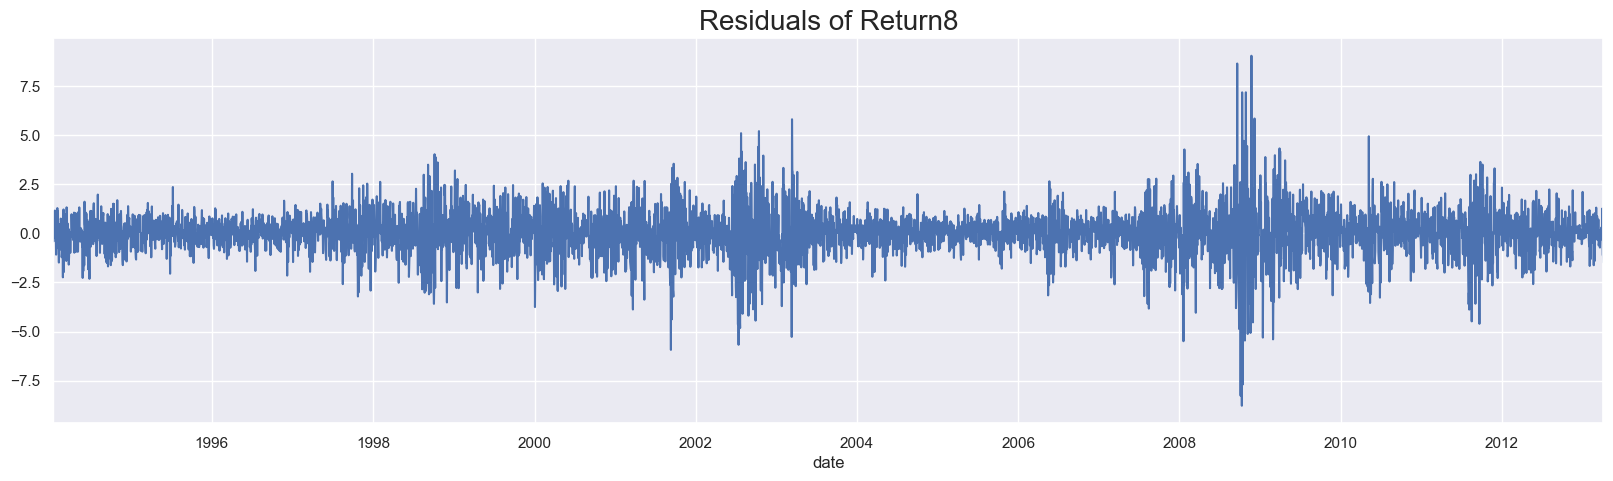

In [62]:
df.res_ret_ma_8[1:].plot(figsize = (20, 5))
plt.title('Residuals of Return8', size = 20)
plt.show()

In [63]:
sts.adfuller(df.res_ret_ma_6[2:])

(-70.82828674685219,
 0.0,
 0,
 5016,
 {'1%': -3.431654355990492,
  '5%': -2.862116384706994,
  '10%': -2.5670768102089263},
 15685.634924362801)

In [64]:
sts.adfuller(df.res_ret_ma_8[2:])

(-70.82453322451077,
 0.0,
 0,
 5016,
 {'1%': -3.431654355990492,
  '5%': -2.862116384706994,
  '10%': -2.5670768102089263},
 15678.620121128206)

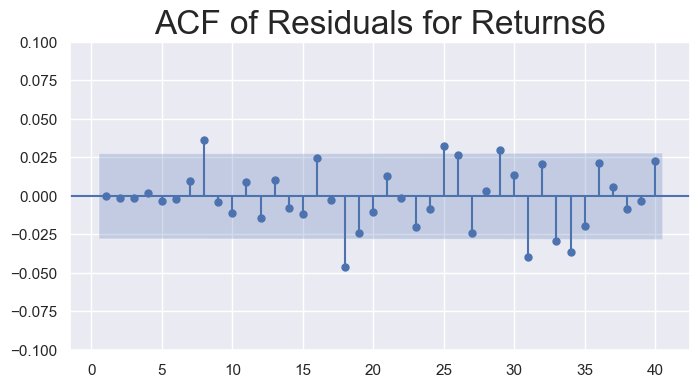

In [73]:
fig, ax = plt.subplots(figsize=(8, 4))
sgt.plot_acf(df.res_ret_ma_6[2:], zero=False, lags=40, ax=ax)
ax.set_ylim(-0.1, 0.1)
plt.title("ACF of Residuals for Returns6", size=24)
plt.show()

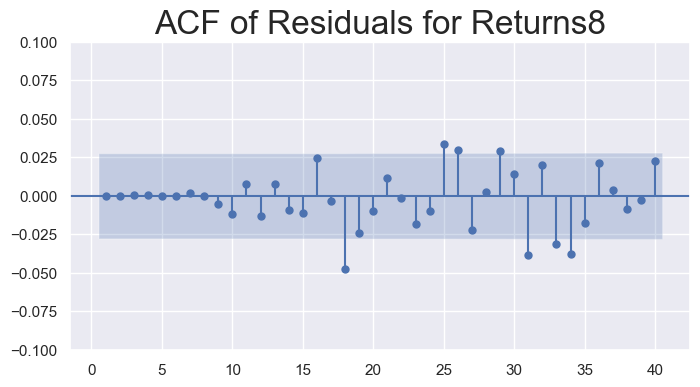

In [72]:
fig, ax = plt.subplots(figsize=(8, 4))
sgt.plot_acf(df.res_ret_ma_8[2:], zero=False, lags=40, ax=ax)
ax.set_ylim(-0.1, 0.1)
plt.title("ACF of Residuals for Returns8", size=24)
plt.show()